# EDA on online retail Data 
## objective : investigate in data for Geolocational Analysis

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import datetime
import warnings

warnings.filterwarnings("ignore")


%matplotlib inline


In [2]:
path = "../../online_retail.csv"
data = pd.read_csv(path)
print(F"number of rows {len(data)}")
data.head(3)

number of rows 1590484


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom


# Handling data

In [3]:
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)
data.InvoiceDate = pd.to_datetime(data.InvoiceDate)
data.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 797884 entries, 0 to 1044846
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    797884 non-null  object        
 1   StockCode    797884 non-null  object        
 2   Description  797884 non-null  object        
 3   Quantity     797884 non-null  int64         
 4   InvoiceDate  797884 non-null  datetime64[ns]
 5   UnitPrice    797884 non-null  float64       
 6   CustomerID   797884 non-null  float64       
 7   Country      797884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 54.8+ MB


## Quick Stat

In [5]:
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,797884.000000,797884,797884.000000,797884.000000
mean,12.602995,2011-01-02 13:16:57.217565696,3.702714,15313.066077
min,-80995.000000,2009-12-01 07:45:00,0.000000,12346.000000
25%,2.000000,2010-07-02 09:47:00,1.250000,13964.000000
50%,5.000000,2010-12-02 12:33:00,1.950000,15228.000000
75%,12.000000,2011-07-31 15:50:00,3.750000,16788.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,191.670491,NaN,71.392592,1696.465165


All nan/null/duplicated values are removed

## calculating received money of each deal

for each deal we must multiply Quantity in unit price of product

In [6]:
data["Quantity"] = data["Quantity"].abs()
data["deal_money"] = data["Quantity"] * data["UnitPrice"]
data.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,deal_money
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00


# Categorize data Based on country

In [7]:
# finding unique countries
len(data.Country.unique())

41

The dataset encompasses data from 41 countries, focusing on the following metrics for analysis:

1. **User Count by Country**: This entails tracking the number of users originating from each country.
2. **Deal Count by Country**: Examining the volume of deals made within each country.
3. **Revenue by Country**: Analyzing the revenue generated from transactions originating in each country.

Furthermore, we'll break down these metrics into monthly and yearly timeframes to gain insights into trends and fluctuations over time.

In [8]:
import calendar

condition = {"deal_money" : "sum",
             "InvoiceNo" : "count",
             "CustomerID" : "nunique"}

data['year'] = data['InvoiceDate'].dt.year
data['month'] = data['InvoiceDate'].dt.month
data['month_name'] = data['month'].apply(lambda x: calendar.month_abbr[x])

country_date = data.groupby(by=["Country", "year", "month_name"], as_index=False).agg(condition).reset_index()
country_date.rename(columns={'InvoiceNo': 'number_of_deals', 
                   'CustomerID': 'number_of_customers'}, inplace=True)
country_date.head(5)

,index,Country,year,month_name,deal_money,number_of_deals,number_of_customers
0,0,Australia,2009,Dec,491.95,27,3
1,1,Australia,2010,Apr,630.95,17,2
2,2,Australia,2010,Aug,176.00,7,1
3,3,Australia,2010,Dec,993.10,34,3
4,4,Australia,2010,Feb,1029.66,32,3


## country - money value

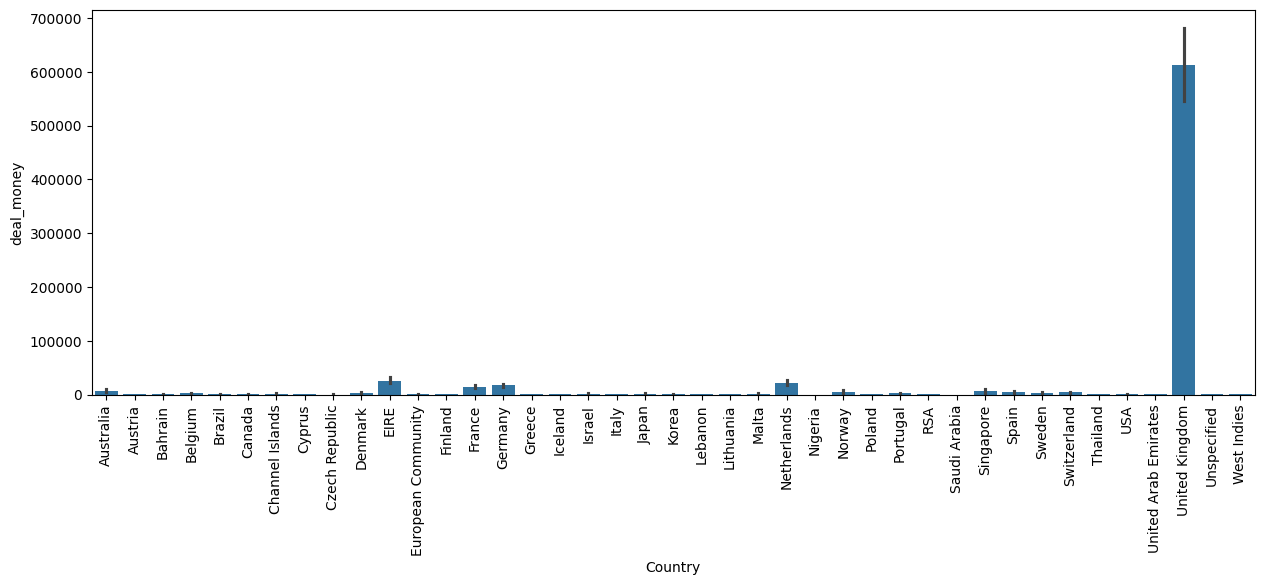

In [9]:
plt.figure(figsize=(15, 5))
sns.barplot(data=country_date,
            x="Country",
            y="deal_money")
plt.xticks(rotation=90)

plt.show()

value of money for UK is way more than other countries, we consider it as a outlier. we must drop it

In [10]:
uk_droped = country_date.loc[country_date["Country"] != "United Kingdom"]
uk_droped.head(3)

,index,Country,year,month_name,deal_money,number_of_deals,number_of_customers
0,0,Australia,2009,Dec,491.95,27,3
1,1,Australia,2010,Apr,630.95,17,2
2,2,Australia,2010,Aug,176.00,7,1


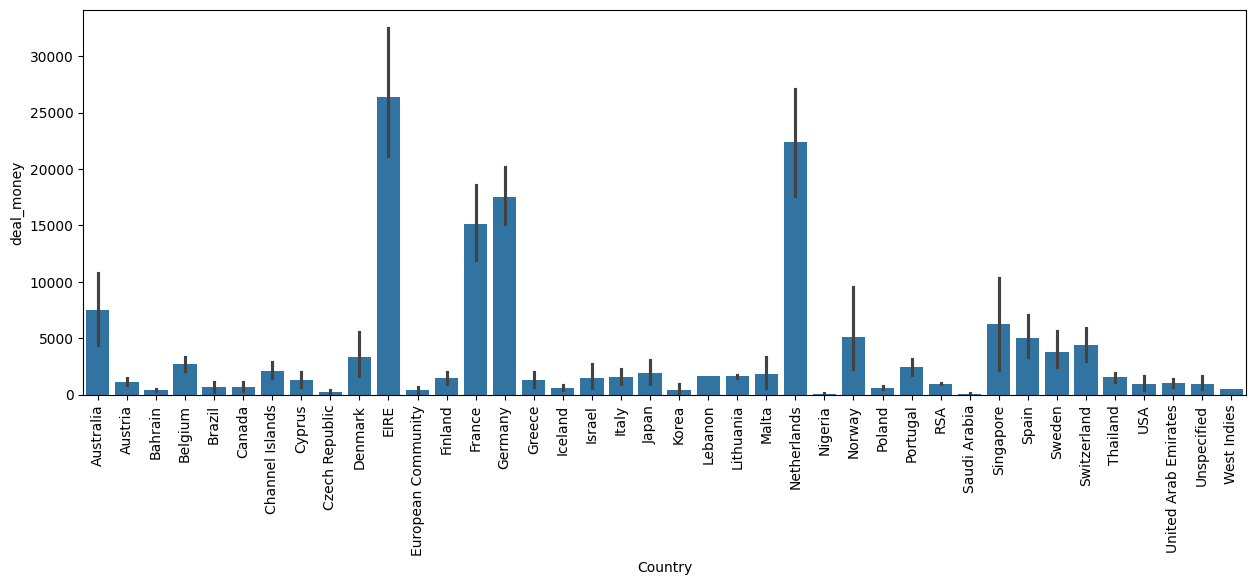

In [13]:
plt.figure(figsize=(15, 5))
sns.barplot(data=uk_droped,
            x="Country",
            y="deal_money")
plt.xticks(rotation=90)

plt.show()

Let's categorize the deal money for each country by year.

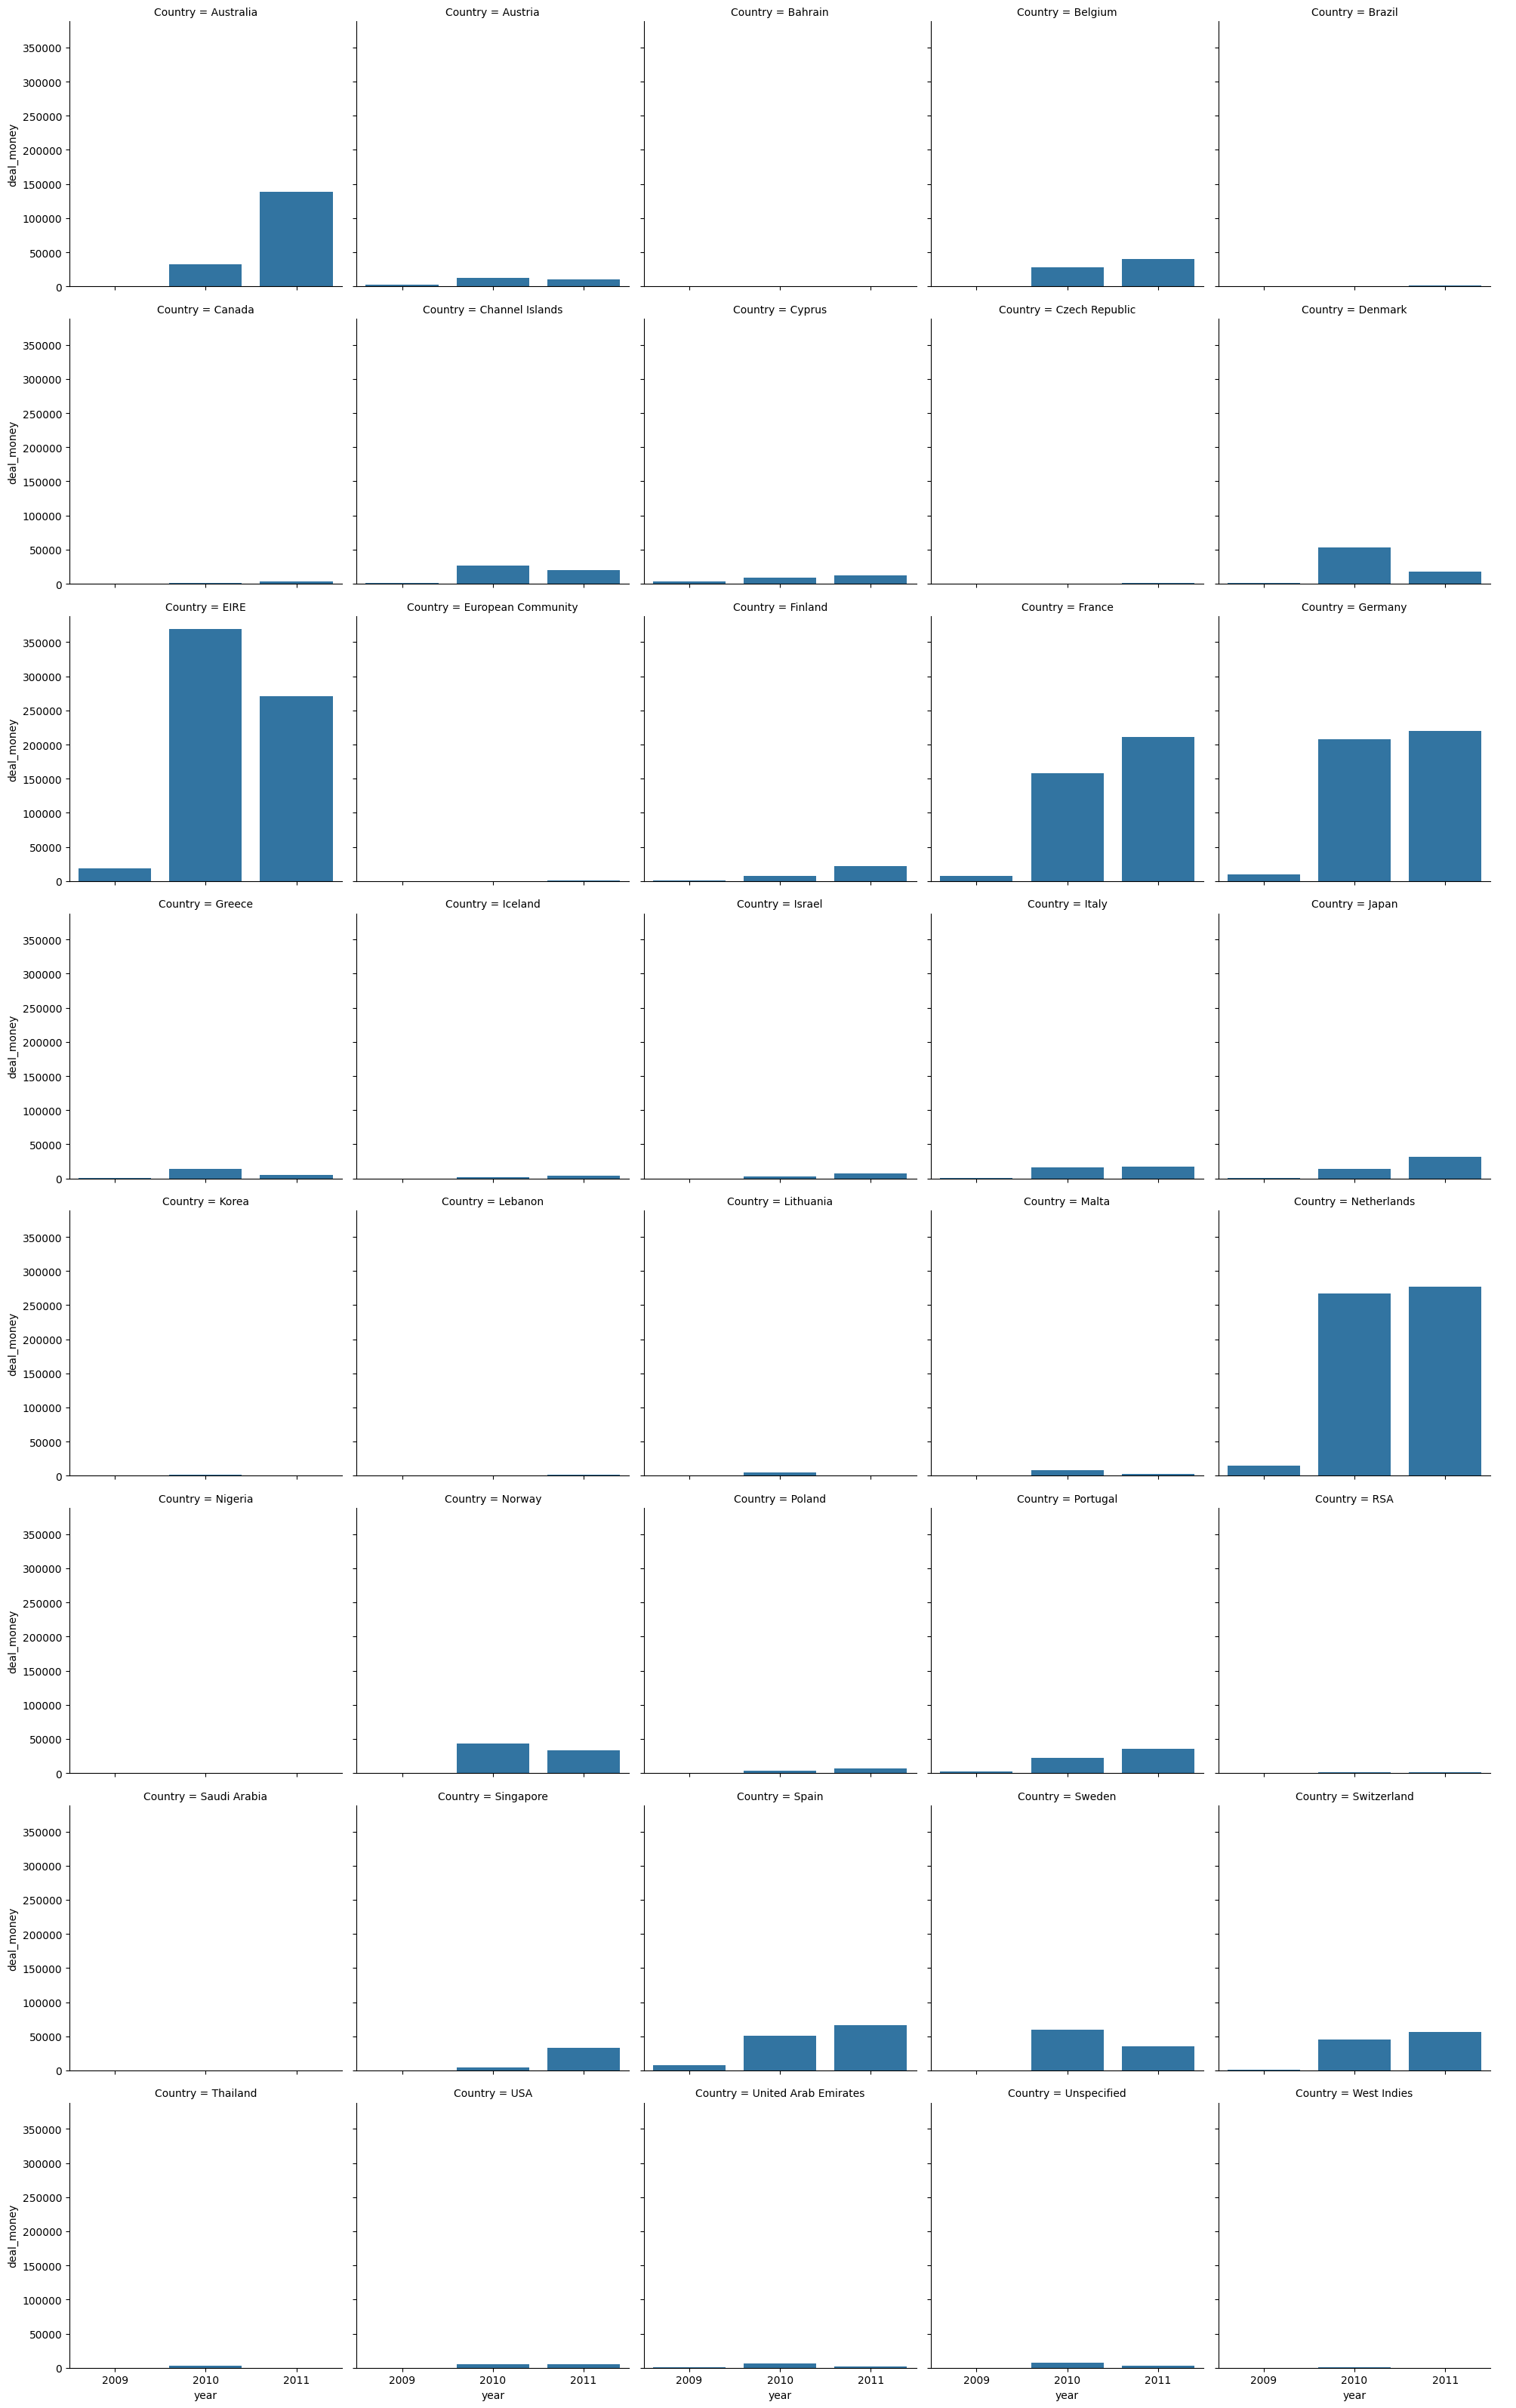

In [14]:
ax =sns.catplot(
    data=uk_droped, kind="bar",
    x="year", y="deal_money", col="Country", estimator="sum",
    height=4, aspect=1, col_wrap=5,  errorbar=None)

plt.show()

The company operates across multiple countries, however, its performance varies significantly across these regions.

# Country - customer

In [14]:
uk_droped.head(5)

,index,Country,year,month_name,deal_money,number_of_deals,number_of_customers
0,0,Australia,2009,Dec,491.95,27,3
1,1,Australia,2010,Apr,630.95,17,2
2,2,Australia,2010,Aug,176.00,7,1
3,3,Australia,2010,Dec,993.10,34,3
4,4,Australia,2010,Feb,1029.66,32,3


In [16]:
uk_droped["Sale_per_customer"] = uk_droped["number_of_deals"] / uk_droped["number_of_customers"]
uk_droped

,index,Country,year,month_name,deal_money,number_of_deals,number_of_customers,Sale_per_customer
0,0,Australia,2009,Dec,491.95,27,3,9.000000
1,1,Australia,2010,Apr,630.95,17,2,8.500000
2,2,Australia,2010,Aug,176.00,7,1,7.000000
3,3,Australia,2010,Dec,993.10,34,3,11.333333
4,4,Australia,2010,Feb,1029.66,32,3,10.666667
...,...,...,...,...,...,...,...,...
559,559,Unspecified,2011,Aug,531.03,23,2,11.500000
560,560,Unspecified,2011,Jul,792.18,146,2,73.000000
561,561,Unspecified,2011,Jun,185.78,9,1,9.000000
562,562,Unspecified,2011,May,852.68,47,1,47.000000


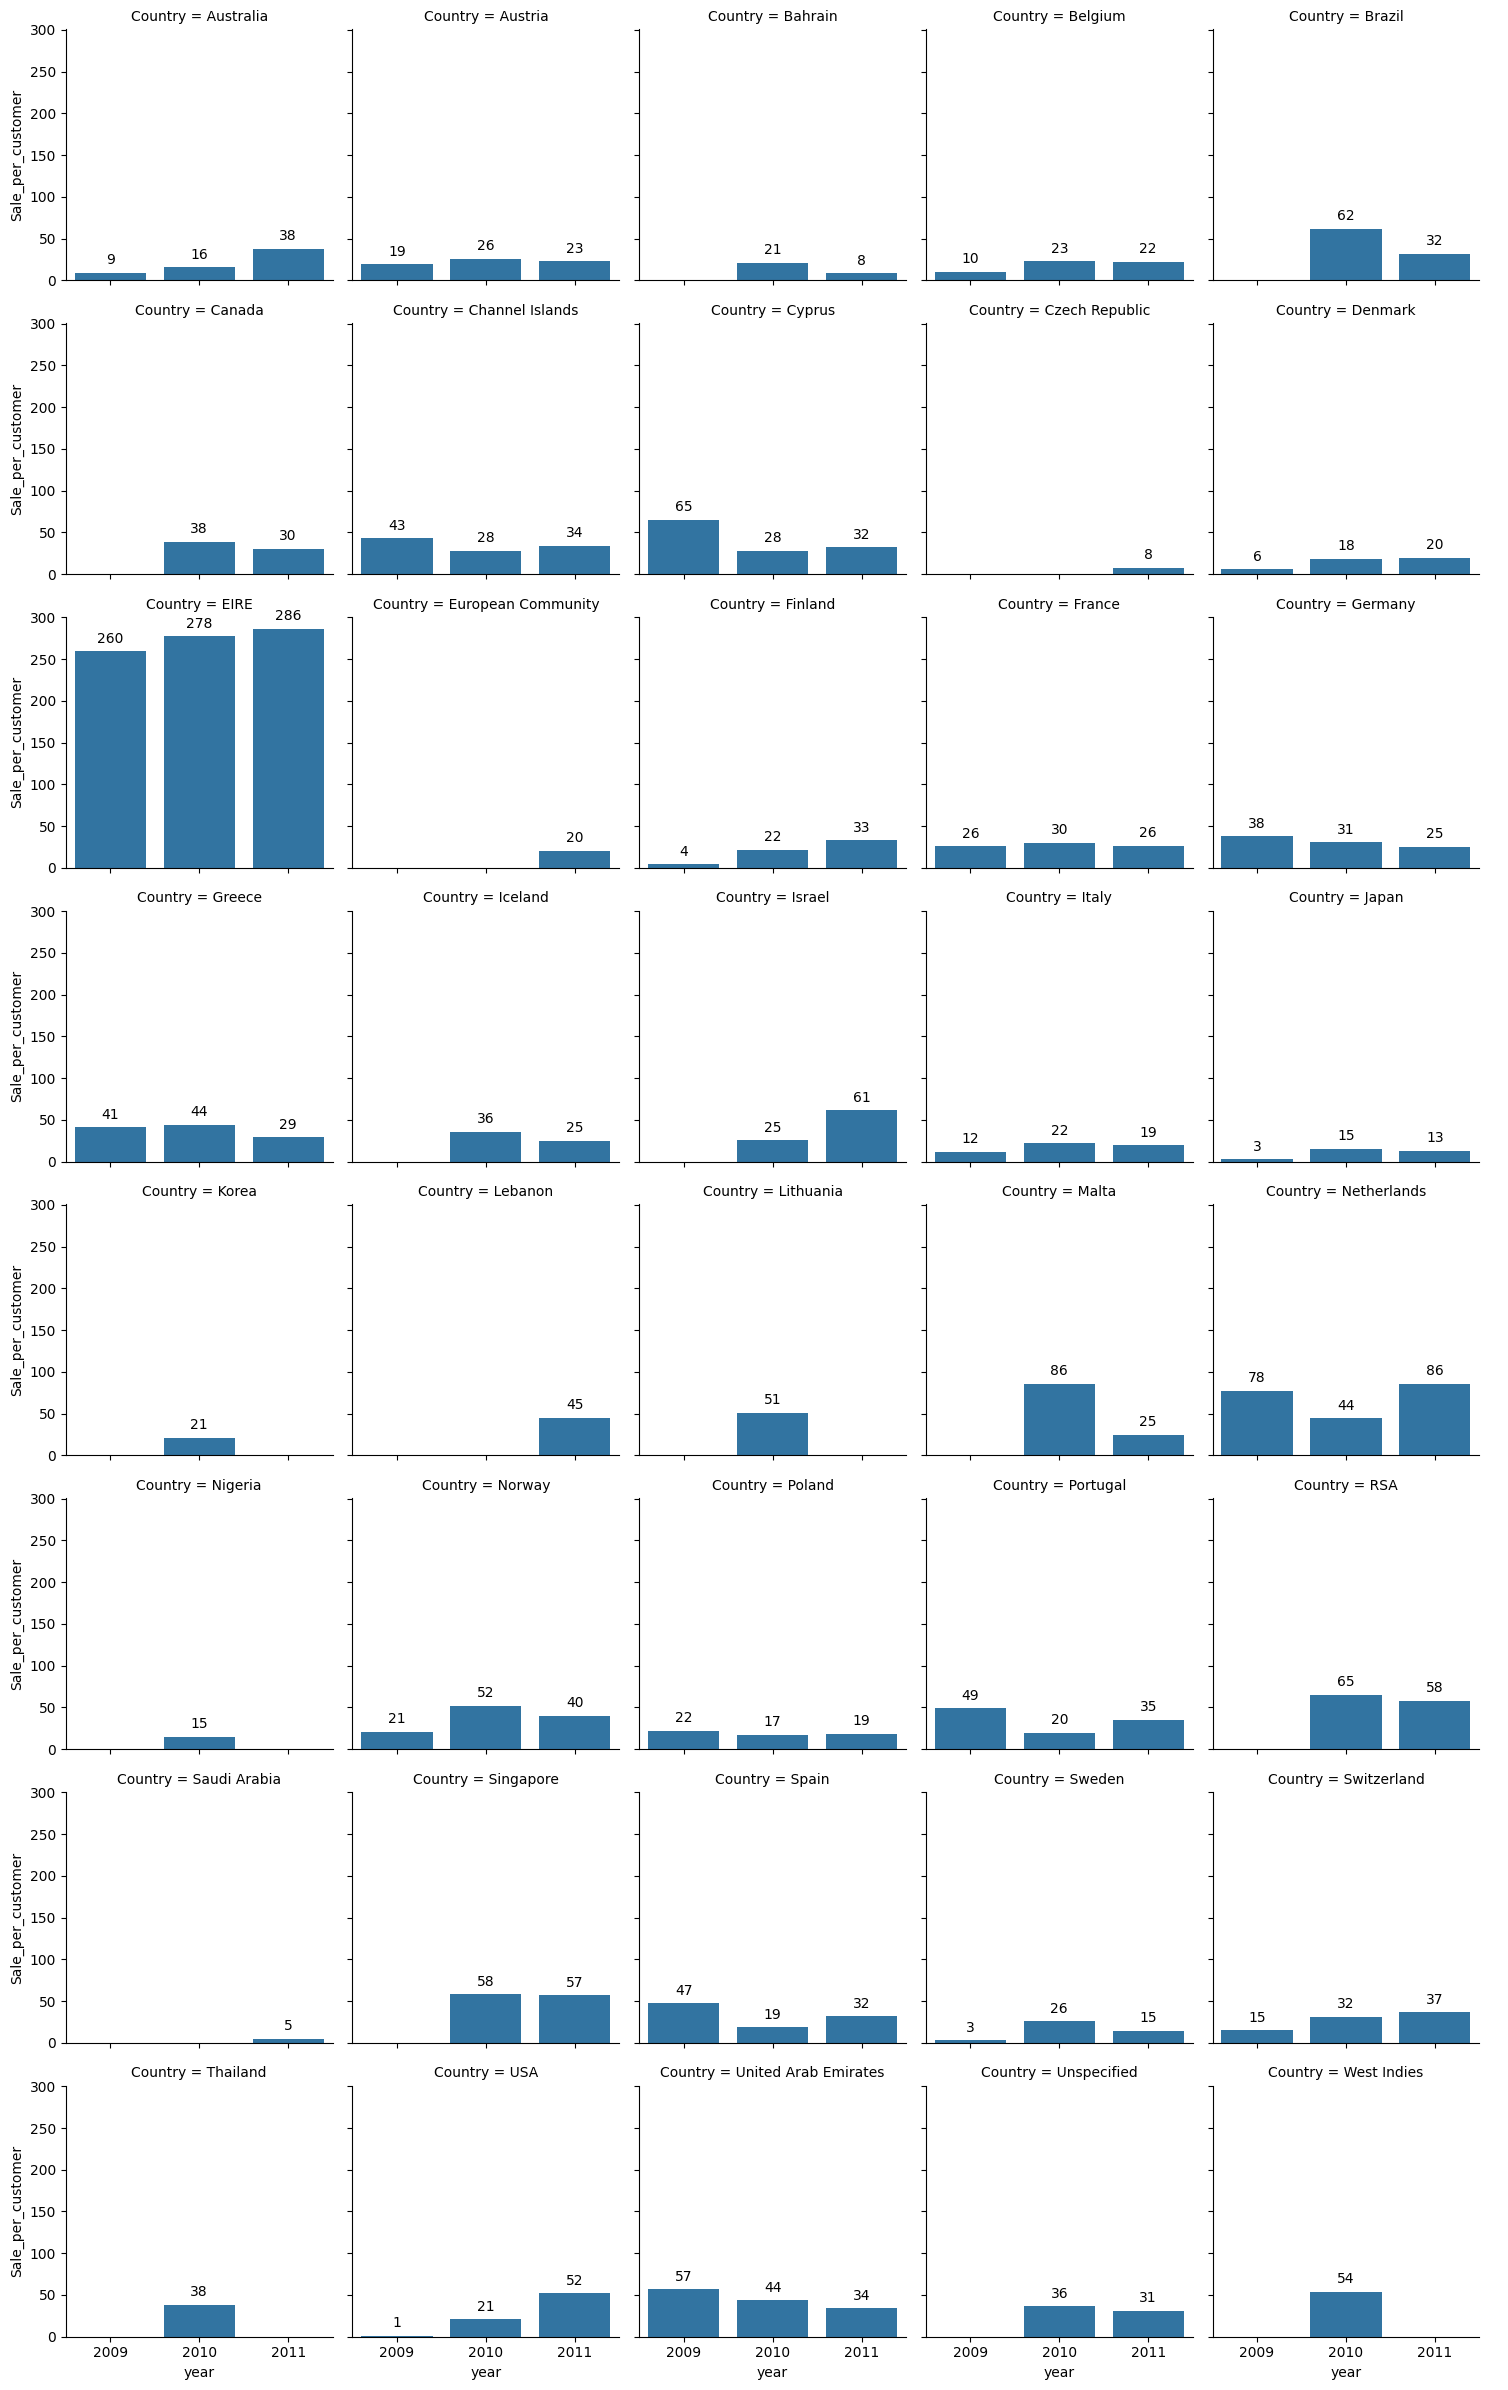

In [39]:
# Assuming uk_droped contains your dataset
ax = sns.catplot(
    data=uk_droped, kind="bar",
    x="year", y="Sale_per_customer", col="Country", estimator="mean",
    height=3, aspect=1, col_wrap=5, errorbar=None
)



# Loop through each subplot
for ax in ax.axes.flat:
    # Add labels to each bar
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points',
                    fontsize=10)
        


        
plt.show()

Considering the broad spectrum of values for the number of deals, number of customers, or deal money, I'll divide the data frame to separate parts
most important factors for a business is increasing number of sales so deviation of data frame must be based on number of sales. 

## Top Sales

In [40]:
top_sale_location = uk_droped.loc[uk_droped["number_of_deals"] > 300]
top_sale_location.head(3)

,index,Country,year,month_name,deal_money,number_of_deals,number_of_customers,Sale_per_customer
150,150,EIRE,2009,Dec,19142.26,519,2,259.500000
151,151,EIRE,2010,Apr,21278.71,496,3,165.333333
152,152,EIRE,2010,Aug,23096.26,502,3,167.333333


In [41]:
fig = px.sunburst(top_sale_location , path=['Country', 'year', 'month_name'], values='number_of_deals')
fig.update_layout(
    width=1200,  # set the width
    height=1200,  # set the height
)
fig.show()

## Mid Sales

In [42]:
mid_sale_location = uk_droped.loc[(uk_droped["number_of_deals"] < 300) & (uk_droped["number_of_deals"] > 100)]
mid_sale_location.head(3)

,index,Country,year,month_name,deal_money,number_of_deals,number_of_customers,Sale_per_customer
6,6,Australia,2010,Jun,3240.28,111,3,37.000
9,9,Australia,2010,Nov,18283.22,176,5,35.200
10,10,Australia,2010,Oct,2989.15,141,8,17.625


In [43]:
fig = px.sunburst(mid_sale_location , path=['Country', 'year', 'month_name'], values='number_of_deals')
fig.update_layout(
    width=1200,  # set the width
    height=1200,  # set the height
)
fig.show()

## Low Sales

In [44]:
low_sale_location = uk_droped.loc[(uk_droped["number_of_deals"] < 100) & (uk_droped["number_of_deals"] > 50)]
low_sale_location.head(3)

,index,Country,year,month_name,deal_money,number_of_deals,number_of_customers,Sale_per_customer
8,8,Australia,2010,May,3429.60,61,4,15.25
14,14,Australia,2011,Feb,14763.37,91,4,22.75
25,25,Austria,2010,Aug,1043.15,62,1,62.00


In [45]:
fig = px.sunburst(low_sale_location , path=['Country', 'year', 'month_name'], values='number_of_deals')
fig.update_layout(
    width=1200,  # set the width
    height=1200,  # set the height
)
fig.show()

## very low sales

In [46]:
very_low_sale_location = uk_droped.loc[uk_droped["number_of_deals"] < 50]
very_low_sale_location.head(3)

,index,Country,year,month_name,deal_money,number_of_deals,number_of_customers,Sale_per_customer
0,0,Australia,2009,Dec,491.95,27,3,9.0
1,1,Australia,2010,Apr,630.95,17,2,8.5
2,2,Australia,2010,Aug,176.00,7,1,7.0


In [47]:
fig = px.sunburst(very_low_sale_location , path=['Country', 'year', 'month_name'], values='number_of_deals')
fig.update_layout(
    width=1200,  # set the width
    height=1200,  # set the height
)
fig.show()

The majority of the revenue originates from the UK, indicating that the company operates primarily in the UK market. Additionally, we can classify the countries into three categories based on sales trends:

1. Countries where the company was active, but sales were not significant.
2. Countries where sales increased over the years.
3. Countries where sales decreased over the years.

# Centeral Tendecy of sales 

In [48]:
uk_droped.head(3)

,index,Country,year,month_name,deal_money,number_of_deals,number_of_customers,Sale_per_customer
0,0,Australia,2009,Dec,491.95,27,3,9.0
1,1,Australia,2010,Apr,630.95,17,2,8.5
2,2,Australia,2010,Aug,176.00,7,1,7.0


In [53]:
uk_droped.groupby(by="year").agg({"deal_money" : "sum"})

,deal_money
year,
2009,76187.720
2010,1491634.701
2011,1595812.080


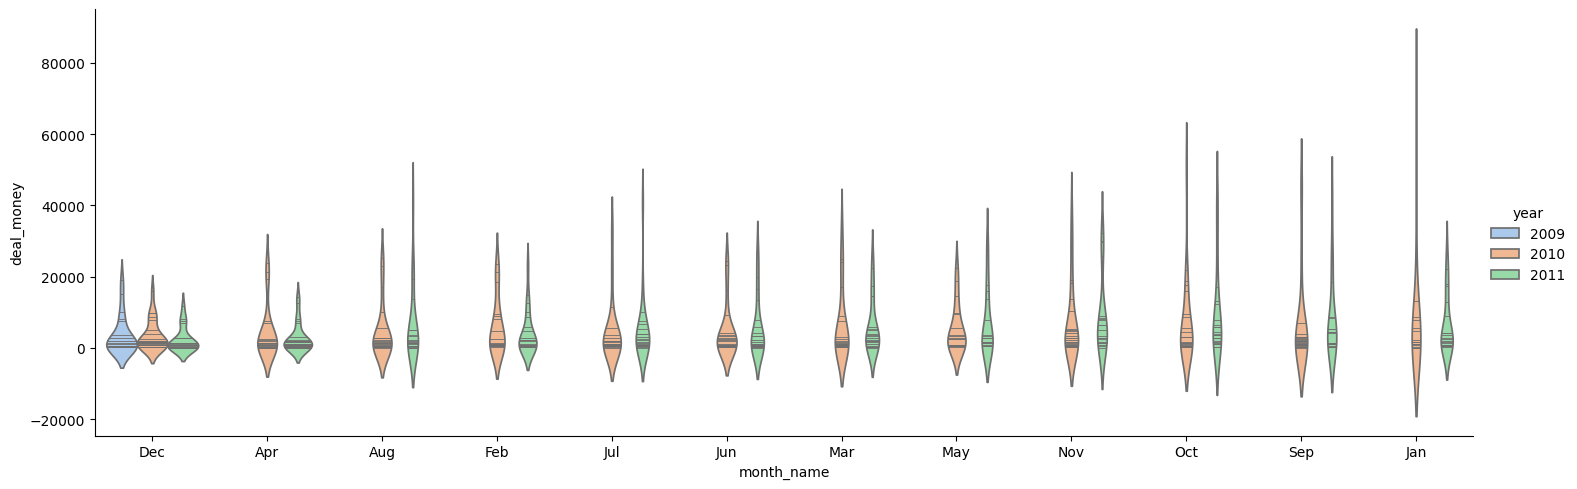

In [51]:
sns.catplot(
    data=uk_droped, x="month_name", y="deal_money", hue="year",
    kind="violin", inner="stick", split=False, palette="pastel",height=5, aspect=3)

over all density of 2010 year is more than 2011 and outliers in 2010 is way bigger than 2011

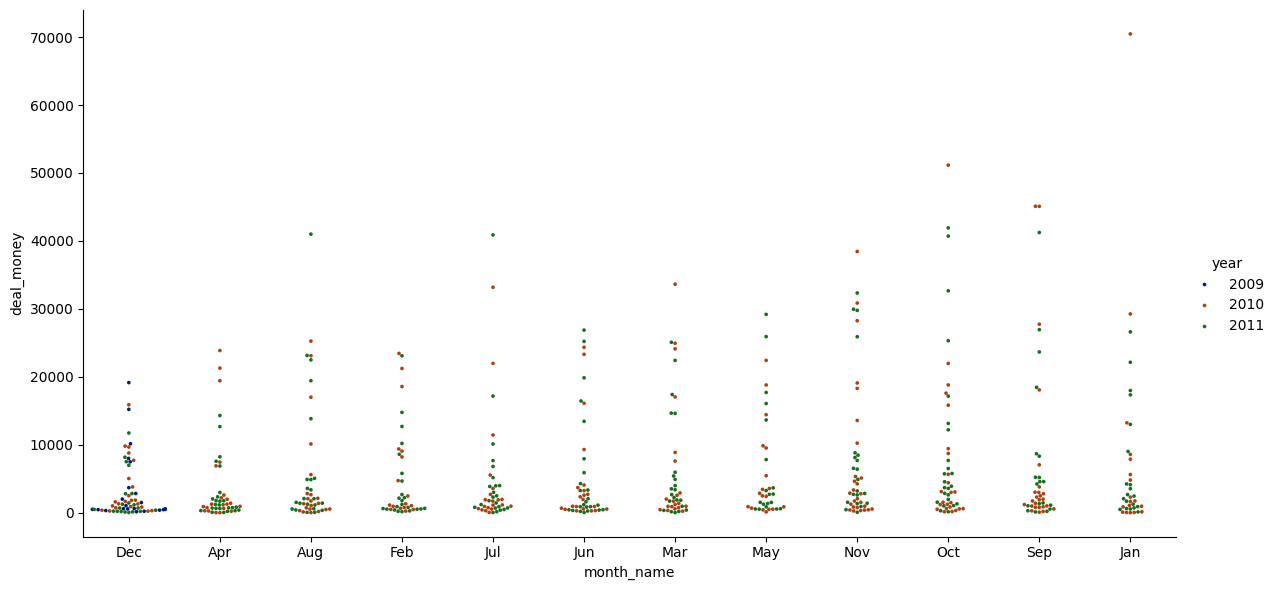

In [25]:
sns.catplot(
    data=uk_droped, x="month_name", y="deal_money", hue="year",s=7,
    kind="swarm", palette="dark",height=6, aspect=2)

In the year 2010, there are notable outliers that warrant further examination:
1. From which countries do these outliers originate?
2. What is the mechanism through which these outliers contribute to the company's market?
3. Why did these countries not sustain or increase their profitability for the company in the subsequent year?

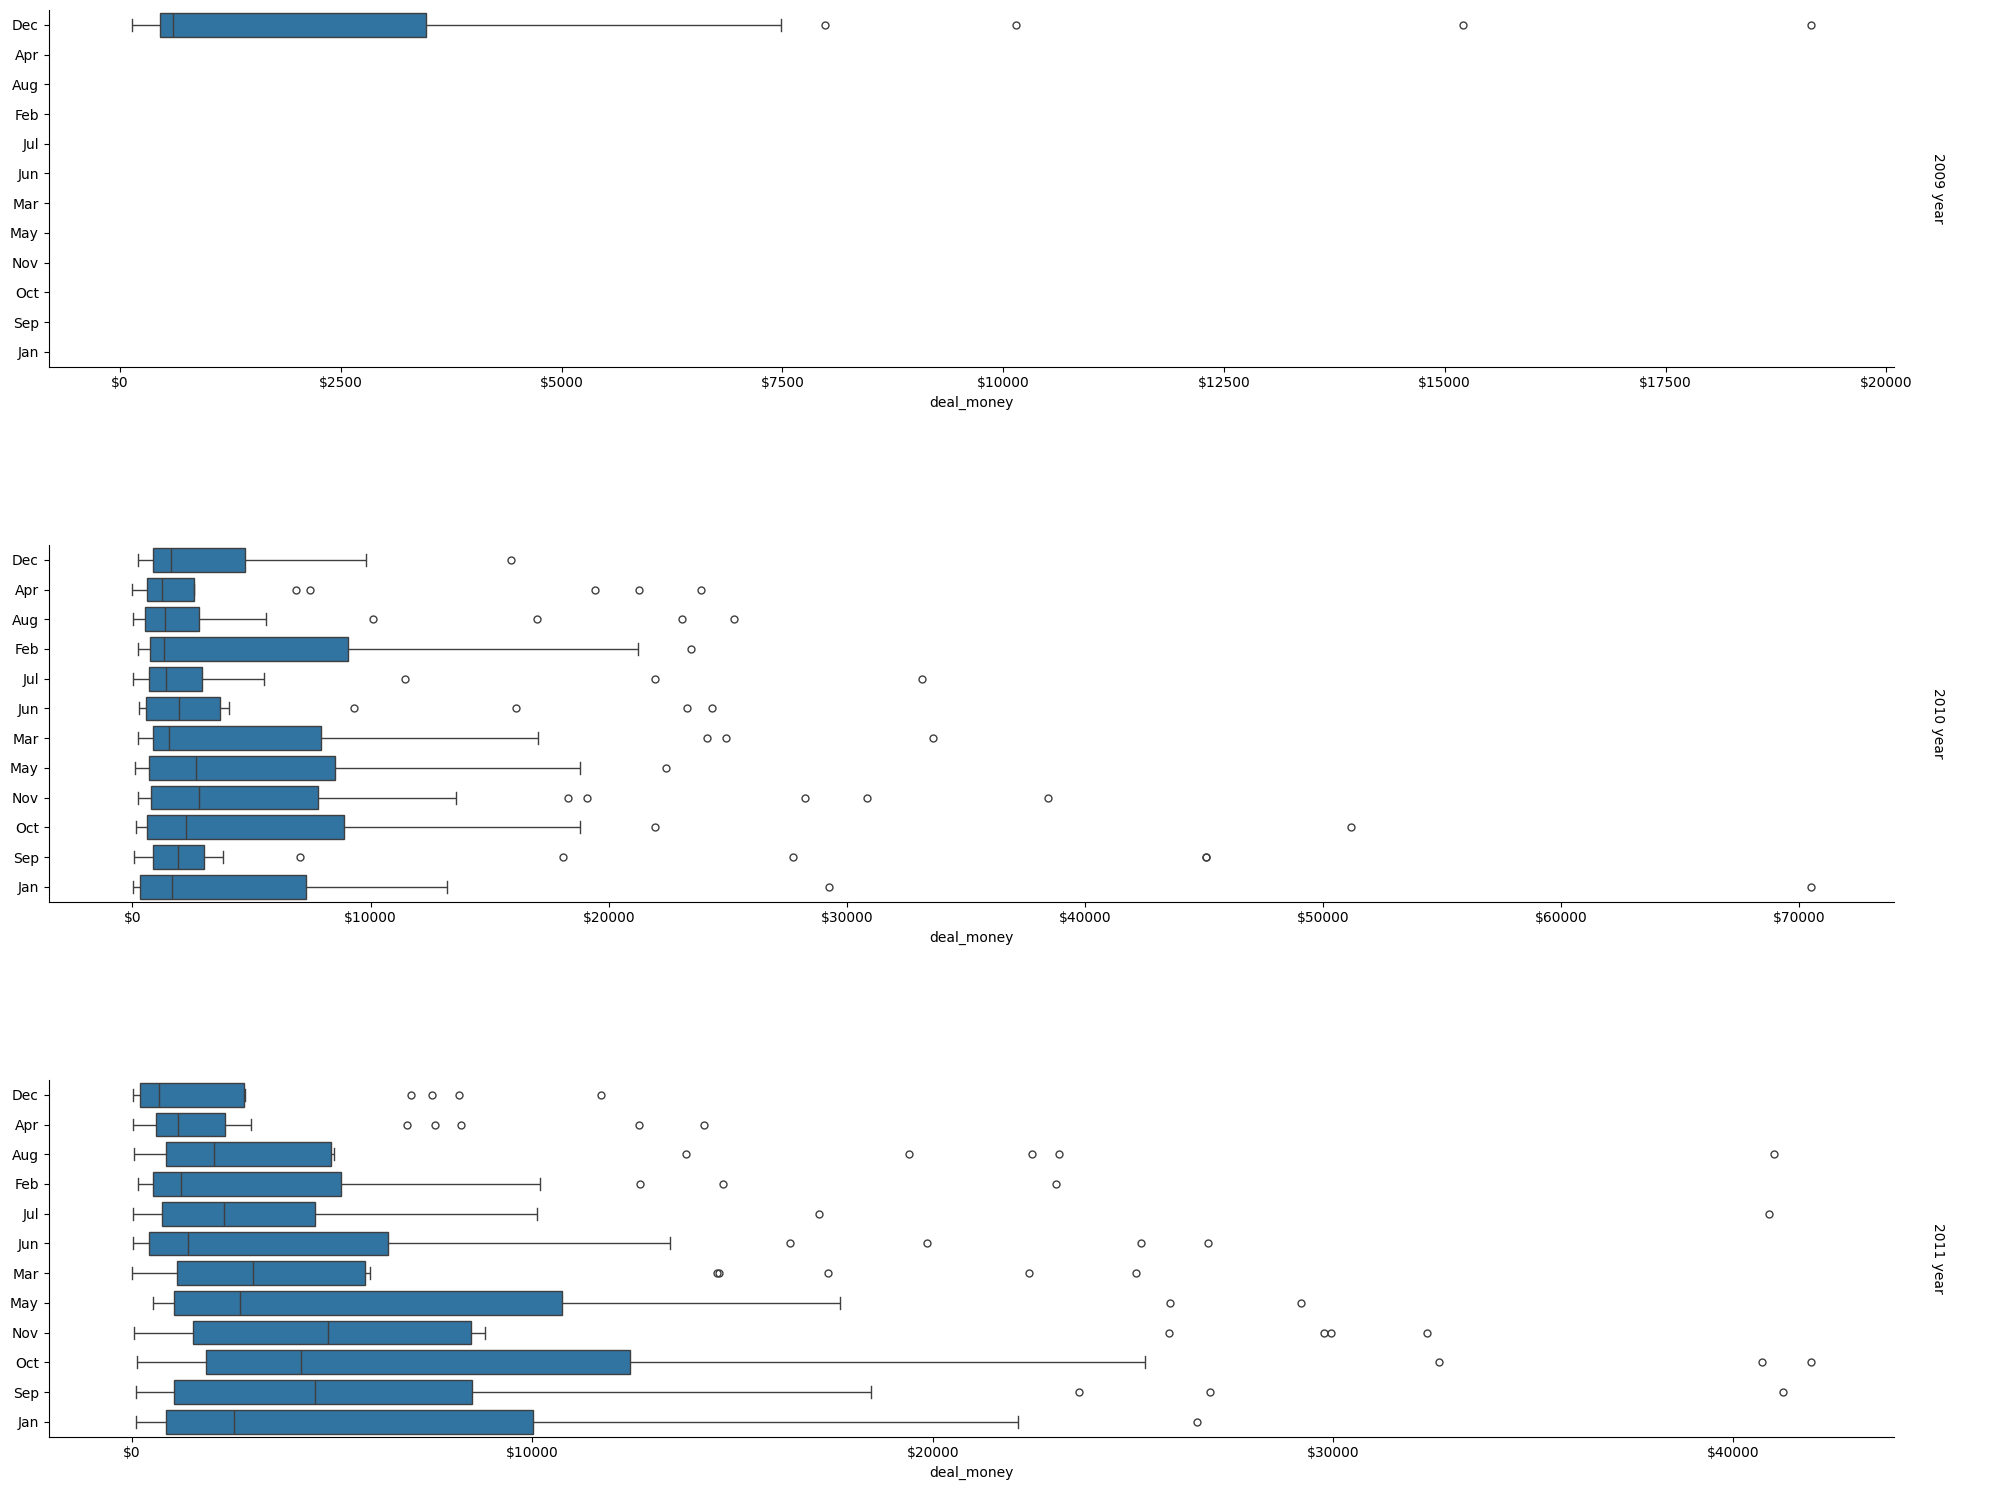

In [26]:

g = sns.catplot(
    data=uk_droped,
    x="deal_money", y="month_name", row="year",
    kind="box", orient="h",
    sharex=False, margin_titles=True,
    height=5, aspect=4,
)
g.set(xlabel="deal_money", ylabel="")
g.set_titles(row_template="{row_name} year")
for ax in g.axes.flat:
    ax.xaxis.set_major_formatter('${x:.0f}')

plt.subplots_adjust(hspace=0.5) 

# revenue VS year

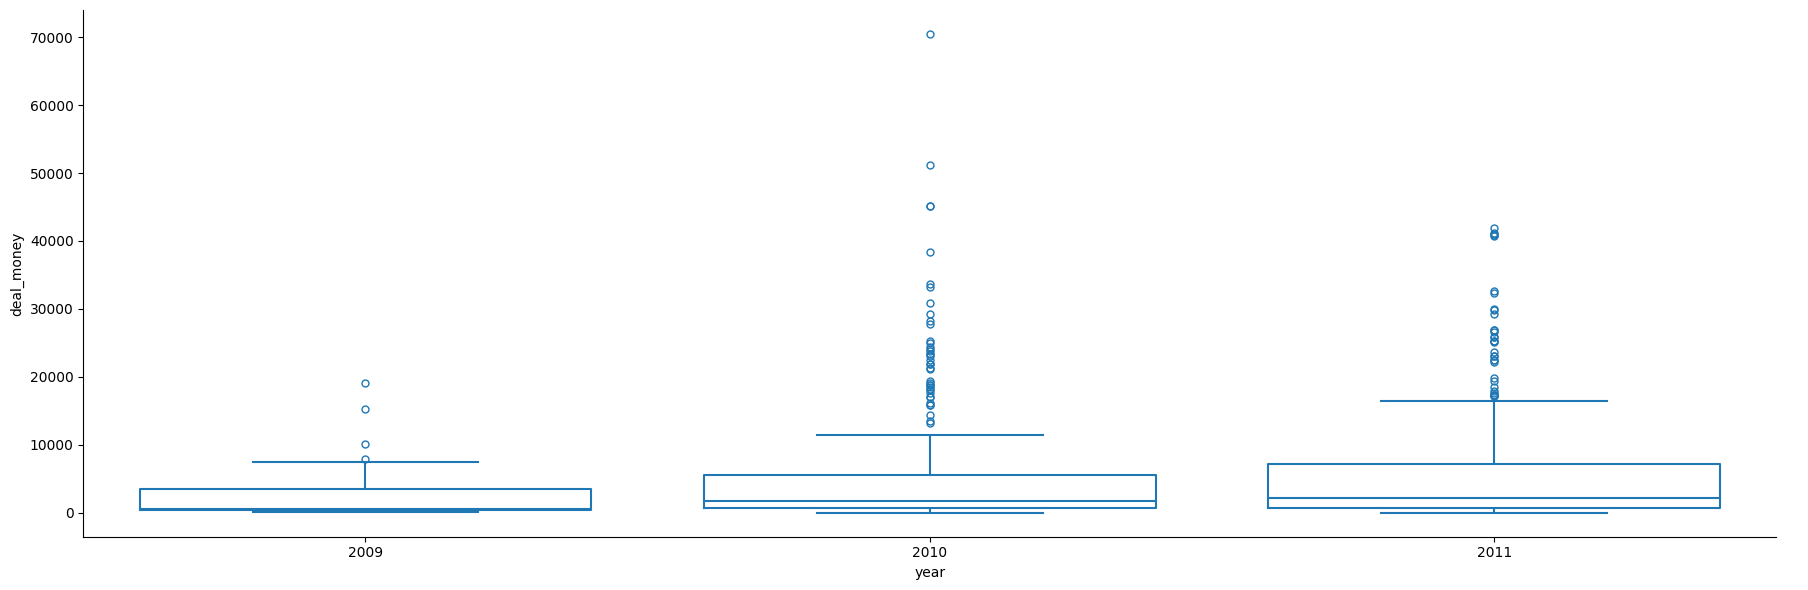

In [27]:

sns.catplot(data=uk_droped, x="year", y="deal_money", kind="box", fill=False, height=6, aspect=3)


The outliers in the year 2010 are larger than those in 2011. However, there is a notable increase in the third quartile and median values for the year 2011, indicating significant growth.

## Central Tendency for changes in number of users based on month

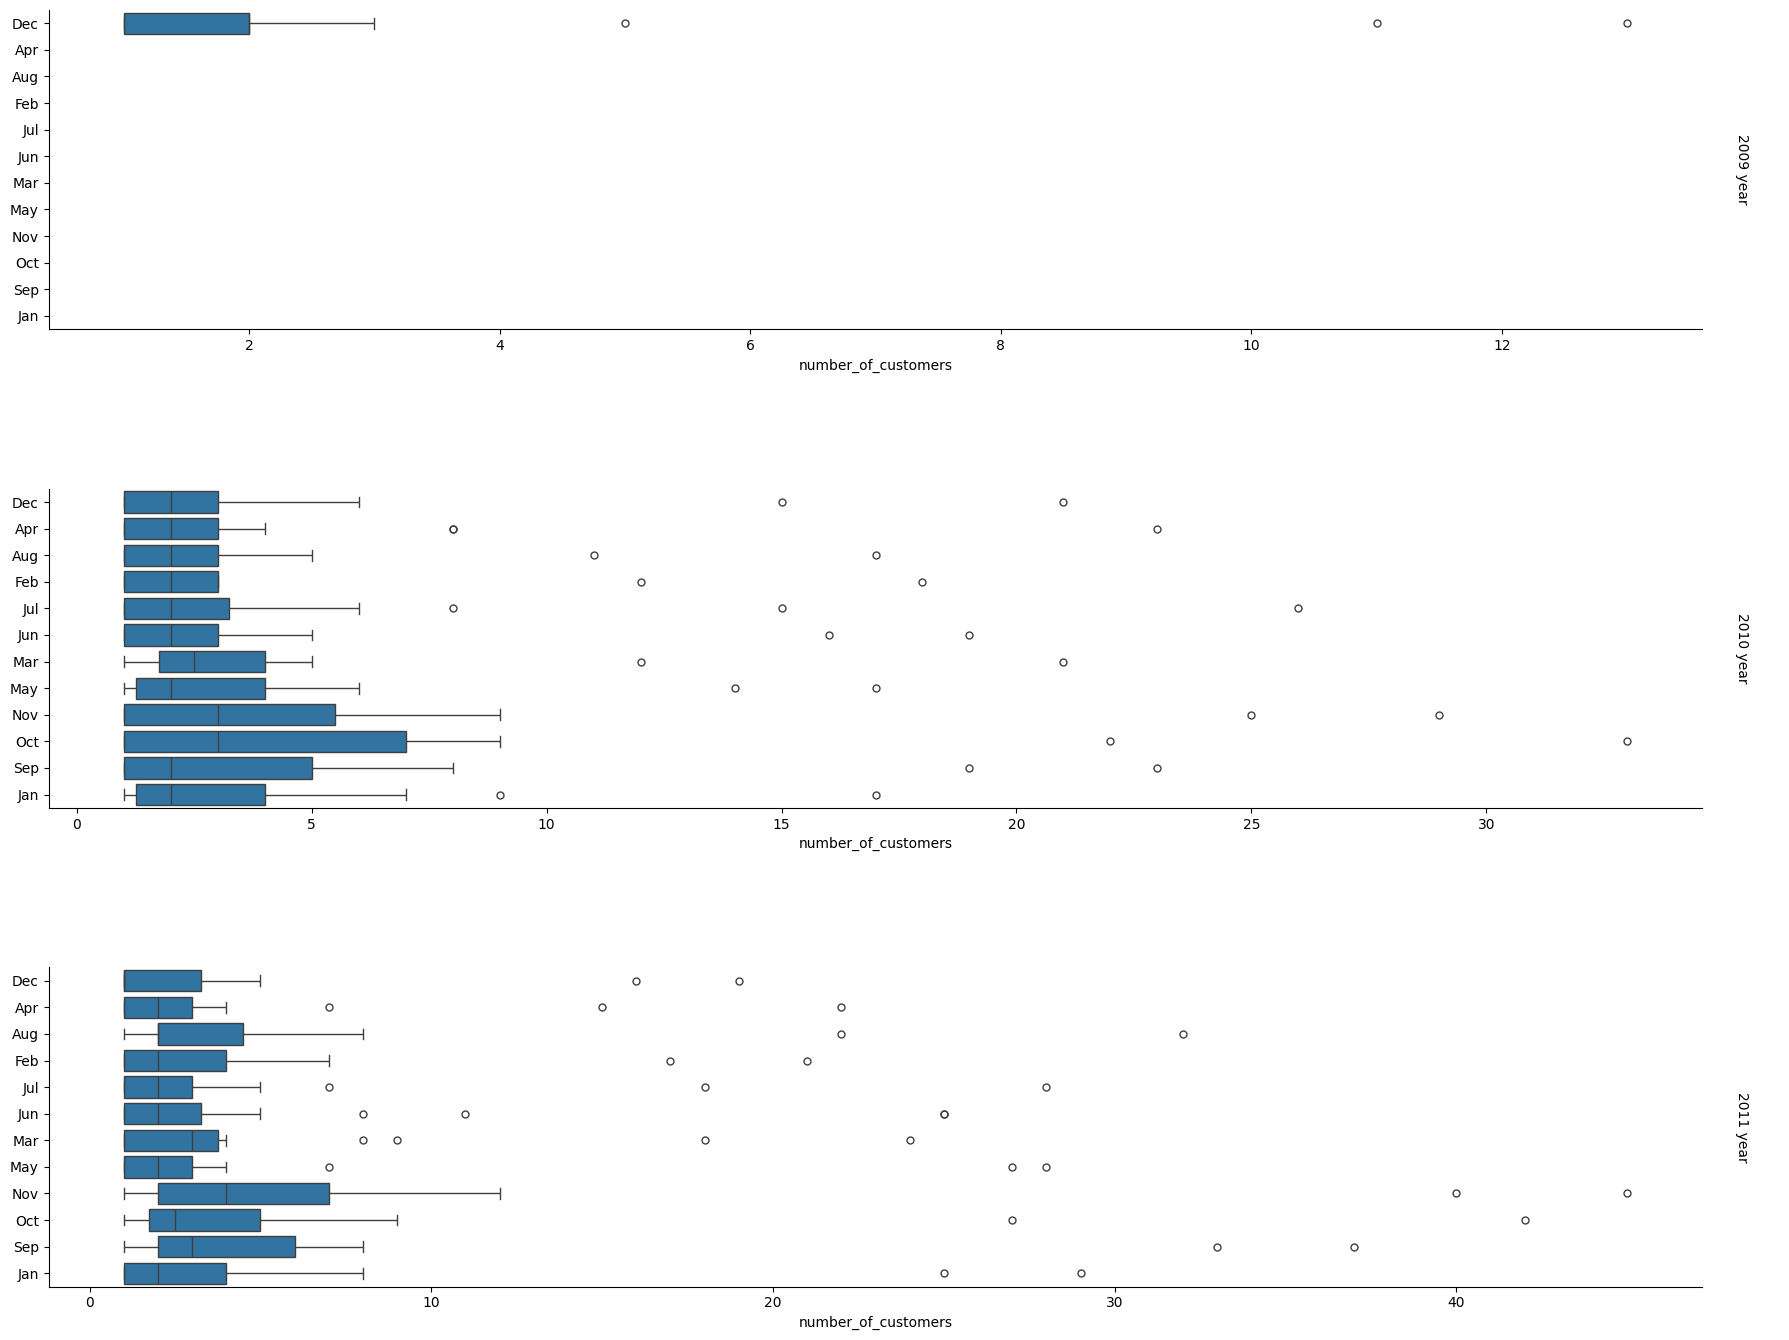

In [28]:
g = sns.catplot(
    data=uk_droped,
    x="number_of_customers", y="month_name", row="year",
    kind="box", orient="h",
    sharex=False, margin_titles=True,
    height=4.5, aspect=4,
)
g.set(xlabel="number_of_customers", ylabel="")
g.set_titles(row_template="{row_name} year")
for ax in g.axes.flat:
    ax.xaxis.set_major_formatter('{x:.0f}')

plt.subplots_adjust(hspace=0.5)

## Central Tendency for changes in number of users based on country

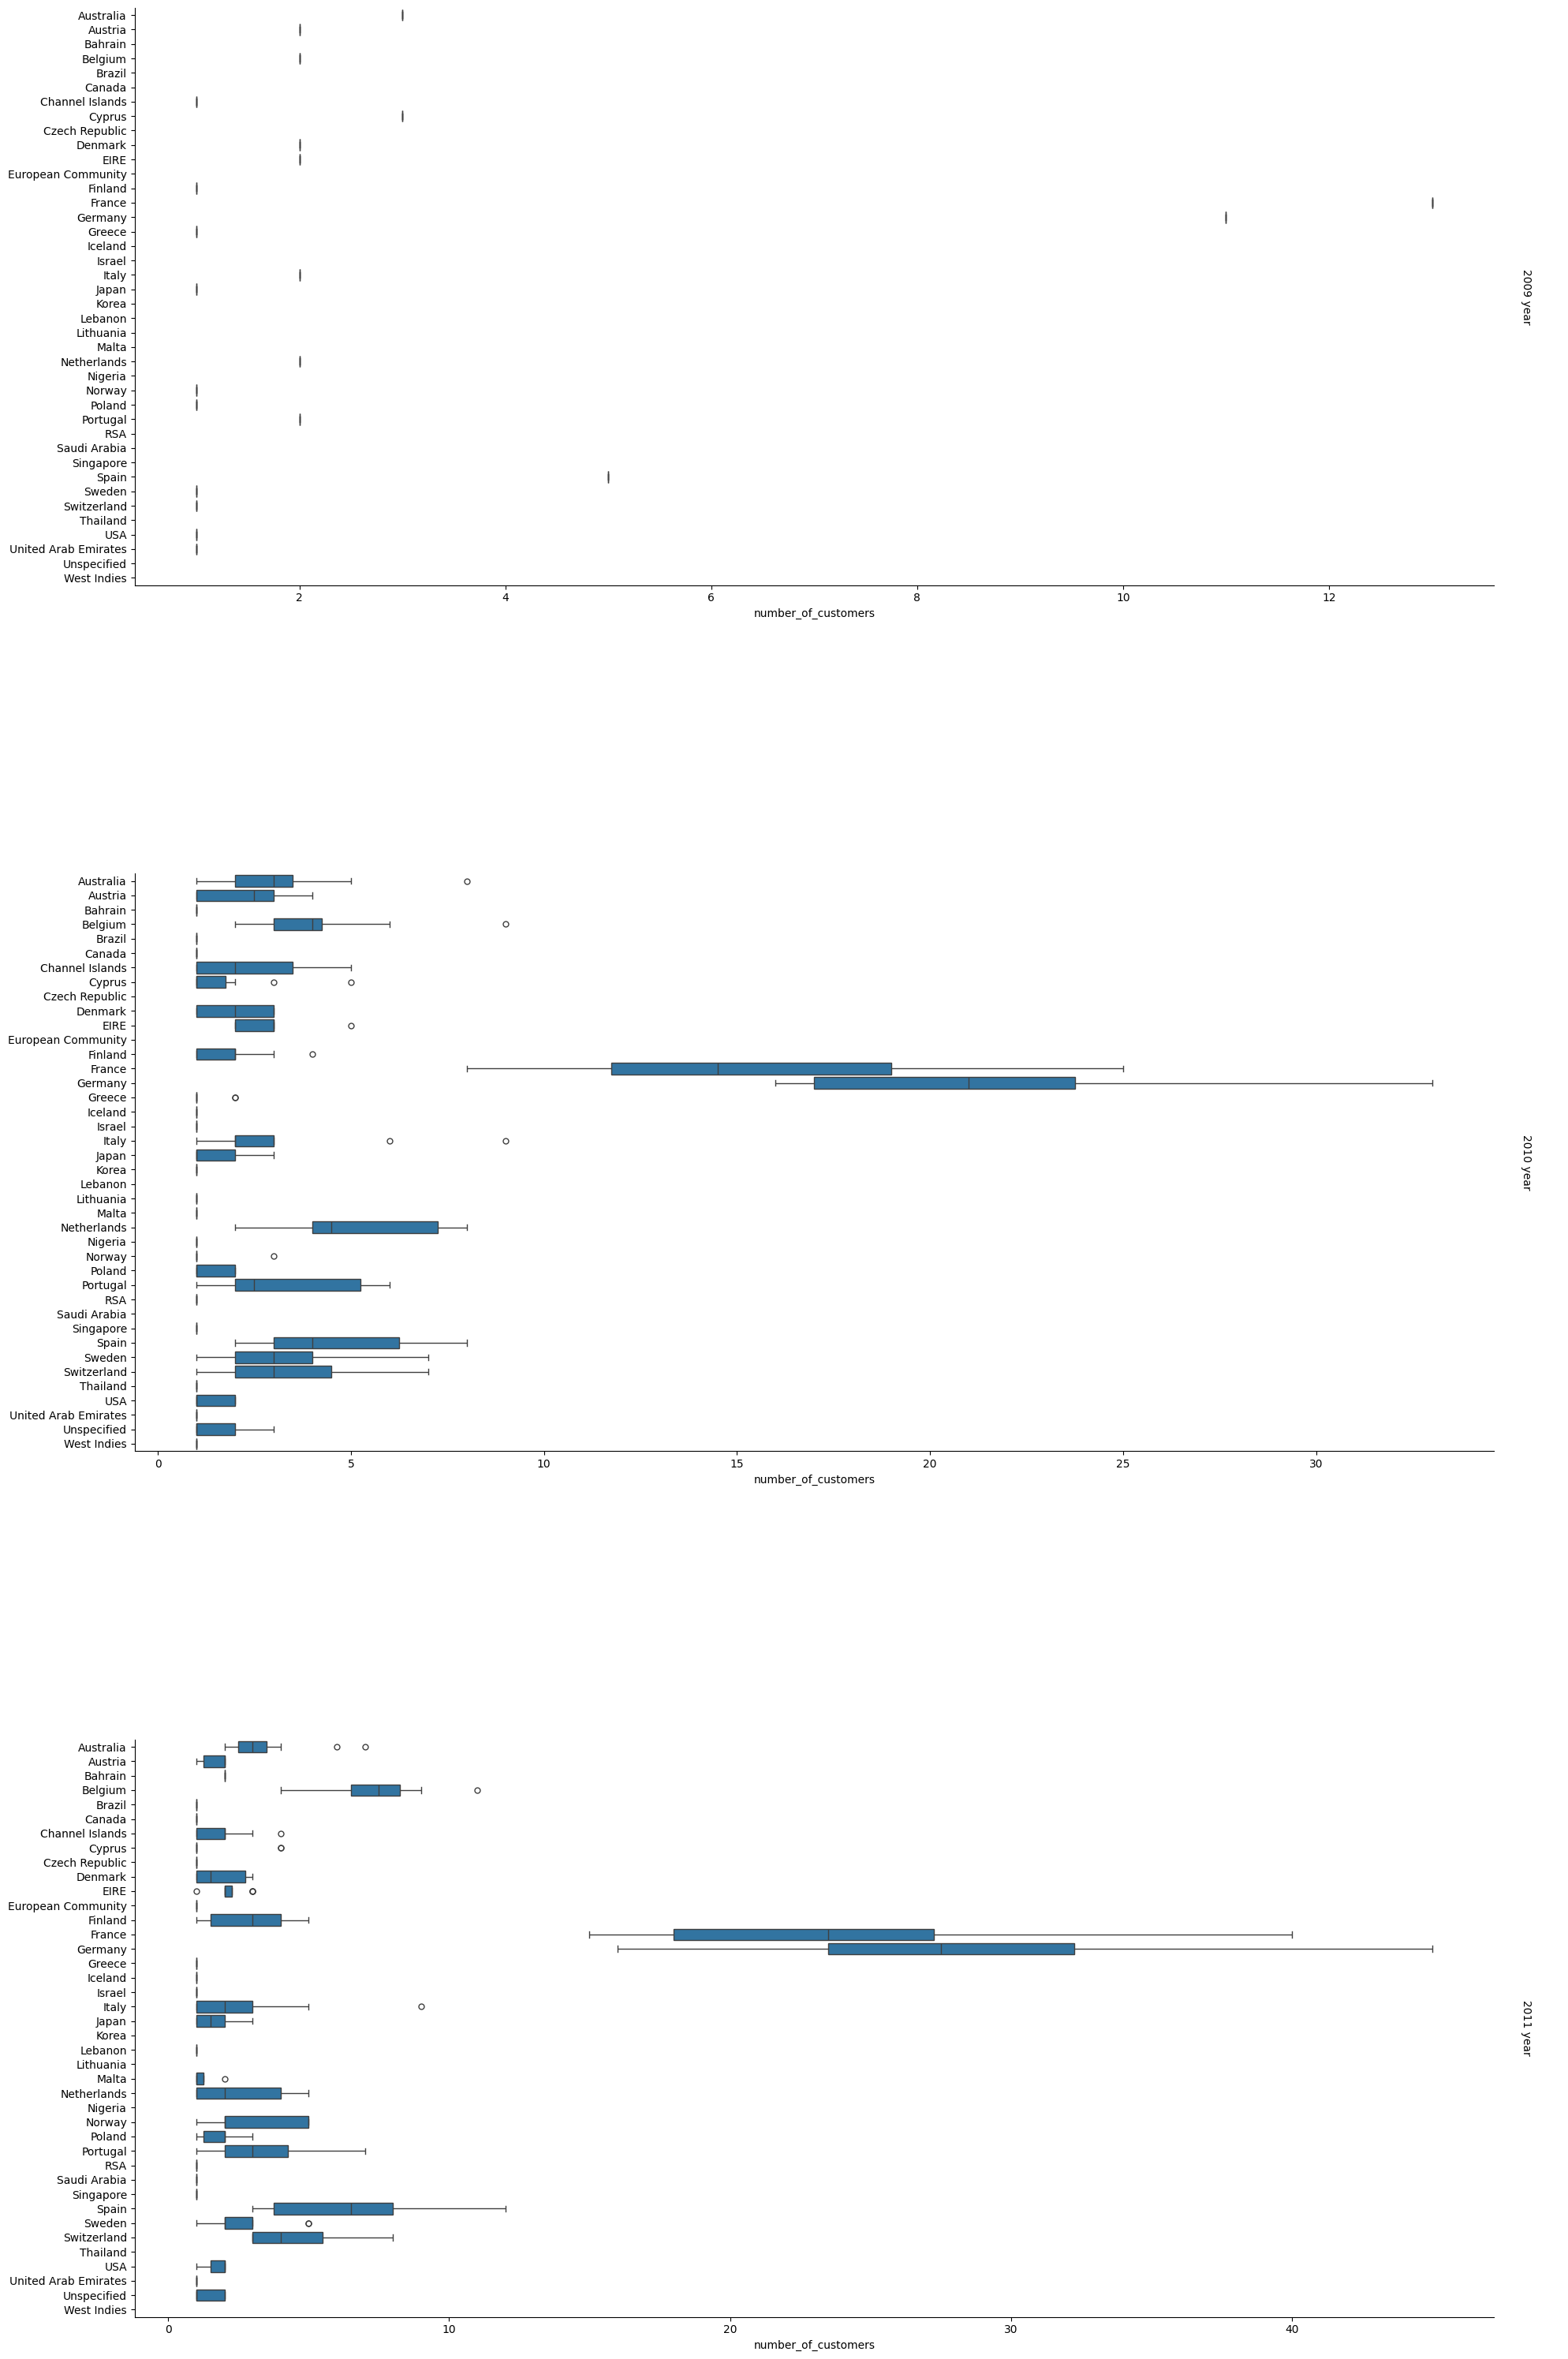

In [29]:
g = sns.catplot(
    data=uk_droped,
    x="number_of_customers", y="Country", row="year",
    kind="box", orient="h",
    sharex=False, margin_titles=True,
    height=10, aspect=2,
)
g.set(xlabel="number_of_customers", ylabel="")
g.set_titles(row_template="{row_name} year")
for ax in g.axes.flat:
    ax.xaxis.set_major_formatter('{x:.0f}')

plt.subplots_adjust(hspace=0.5)

After the UK, our business serves a significant number of customers in Germany and France.

# most Frequent Sales based on location

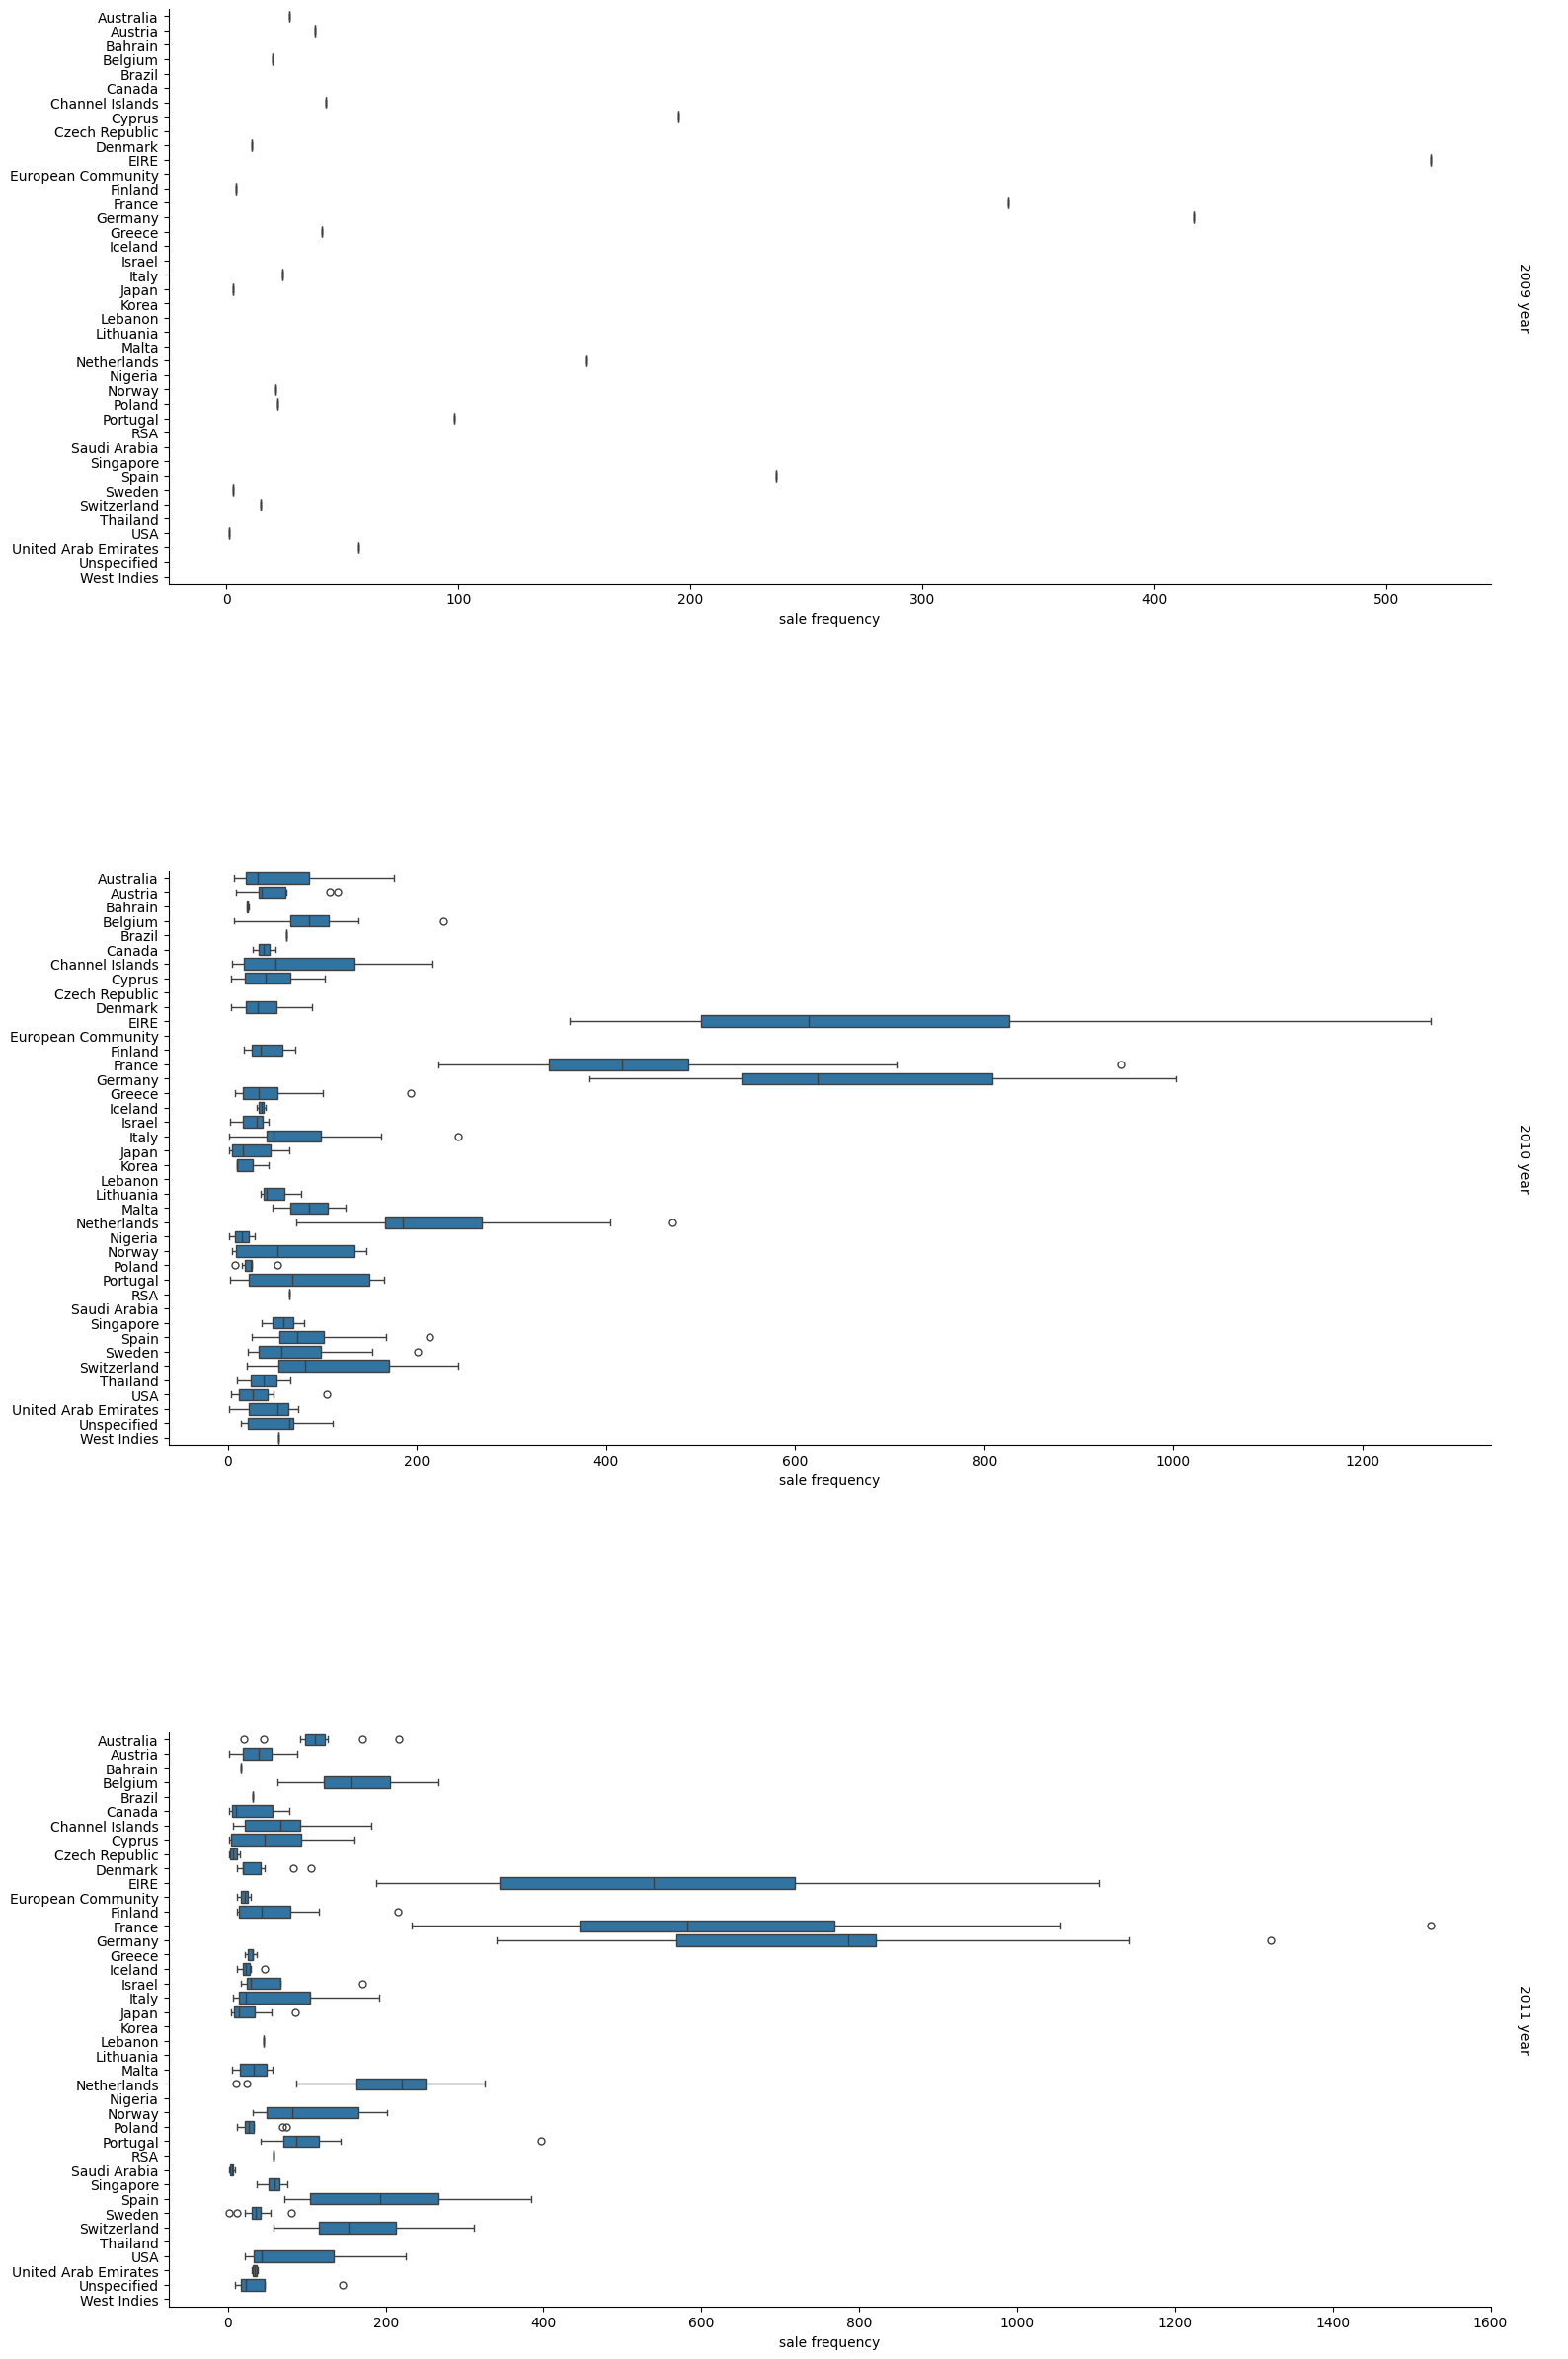

In [65]:
g = sns.catplot(
    data=uk_droped,
    x="number_of_deals", y="Country", row="year",
    kind="box", orient="h",
    sharex=False, margin_titles=True,
    height=8, aspect=2,
)
g.set(xlabel="sale frequency", ylabel="")
g.set_titles(row_template="{row_name} year")
for ax in g.axes.flat:
    ax.xaxis.set_major_formatter('{x:.0f}')

plt.subplots_adjust(hspace=0.5)

After the UK, the majority of sales are generated from Germany, France, and Erie.

# World Map

In [55]:
country_date.head()

,index,Country,year,month_name,deal_money,number_of_deals,number_of_customers
0,0,Australia,2009,Dec,491.95,27,3
1,1,Australia,2010,Apr,630.95,17,2
2,2,Australia,2010,Aug,176.00,7,1
3,3,Australia,2010,Dec,993.10,34,3
4,4,Australia,2010,Feb,1029.66,32,3


In [56]:
country_date = country_date.loc[country_date["Country"] != "Unspecified"] # drop sales with undefined location

In [57]:
month_dict = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,
    'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8,
    'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}

# Add leading zero to month number if needed
country_date['month'] = country_date['month_name'].map(month_dict)

# Create a new column combining 'year', 'month', and '01' as day
country_date['date'] = pd.to_datetime(country_date[['year', 'month']].assign(day=1))

# Drop the intermediate 'month' column if not needed anymore
country_date.drop('month', axis=1, inplace=True)
country_date.head(3)

,index,Country,year,month_name,deal_money,number_of_deals,number_of_customers,date
0,0,Australia,2009,Dec,491.95,27,3,2009-12-01
1,1,Australia,2010,Apr,630.95,17,2,2010-04-01
2,2,Australia,2010,Aug,176.00,7,1,2010-08-01


In [58]:
import country_converter as coco


# To draw world map we must convert name of countries to iso 3 code.
country_date["iso3"] = coco.convert(names=country_date["Country"], to="ISO3")

"""
The ISO 3166-1 alpha-3 codes for the following regions could not be found using the 'country_converter' library:
 Channel Islands, EIRE (Ireland), European Community, RSA (South Africa), and West Indies. Consequently, I will need to handle this manually.
"""
country_date["iso3"].loc[country_date["Country"] == "Channel Islands"] = "GB"
country_date["iso3"].loc[country_date["Country"] == "EIRE"] = "IRL"
country_date["iso3"].loc[country_date["Country"] == "European Community"] = "EU"
country_date["iso3"].loc[country_date["Country"] == "West Indies"] = "JAM"
country_date["iso3"].loc[country_date["Country"] == "RSA"] = "ZAF"


Channel Islands not found in regex
Channel Islands not found in regex
Channel Islands not found in regex
Channel Islands not found in regex
Channel Islands not found in regex
Channel Islands not found in regex
Channel Islands not found in regex
Channel Islands not found in regex
Channel Islands not found in regex
Channel Islands not found in regex
Channel Islands not found in regex
Channel Islands not found in regex
Channel Islands not found in regex
Channel Islands not found in regex
Channel Islands not found in regex
Channel Islands not found in regex
Channel Islands not found in regex
Channel Islands not found in regex
Channel Islands not found in regex
Channel Islands not found in regex
Channel Islands not found in regex
Channel Islands not found in regex
Channel Islands not found in regex
EIRE not found in regex
EIRE not found in regex
EIRE not found in regex
EIRE not found in regex
EIRE not found in regex
EIRE not found in regex
EIRE not found in regex
EIRE not found in regex
EIR

**The ISO3 codes for Channel Islands, EIRE, European Community, RSA, and West Indies could not be found using the Coco library. Manual handling of this issue is necessary.**


In [59]:
country_date.head(3)

,index,Country,year,month_name,deal_money,number_of_deals,number_of_customers,date,iso3
0,0,Australia,2009,Dec,491.95,27,3,2009-12-01,AUS
1,1,Australia,2010,Apr,630.95,17,2,2010-04-01,AUS
2,2,Australia,2010,Aug,176.00,7,1,2010-08-01,AUS


In [60]:

grouped_data = country_date.groupby(['Country', 'iso3'], as_index=True).agg({
    'deal_money': 'sum',
    'number_of_customers': 'sum',
    'number_of_deals': 'sum'
}).reset_index()


grouped_data.rename(columns={"deal_money": "Revenue"}, inplace=True)

grouped_data.head(3)

,Country,iso3,Revenue,number_of_customers,number_of_deals
0,Australia,AUS,172122.50,76,1890
1,Austria,AUT,24048.42,42,938
2,Bahrain,BHR,1354.37,4,59


**```To remove the United Kingdom as an outlier, execute the cell below:```**

In [61]:
# Drop rows where column 'A' has value 'foo'
grouped_data.drop(grouped_data[grouped_data['Country'] == 'United Kingdom'].index, inplace=True)

In [64]:

# Now use the grouped data for choropleth plot
fig = px.choropleth(grouped_data, locations="iso3",
                    color="Revenue", 
                    hover_name="Country",
                    hover_data=["number_of_customers", "number_of_deals"],
                    color_continuous_scale=px.colors.sequential.Plasma)



fig.update_layout(
    title="International Sales Information",
    height=600,  # Adjust the height of the figure
    width=1500    # Adjust the width of the figure
)


fig.show()


# KPI Tracking

## let's sum up number of sales, customers, revenue  for each month

In [72]:
total_per_mon = uk_droped.groupby(by=["Country", "year", "month_name"], as_index=False).agg({"deal_money": "sum", "number_of_customers":"sum", "number_of_deals": "sum"})
total_per_mon.head(3)


,Country,year,month_name,deal_money,number_of_customers,number_of_deals
0,Australia,2009,Dec,491.95,3,27
1,Australia,2010,Apr,630.95,2,17
2,Australia,2010,Aug,176.00,1,7


## revenue per customer

In [78]:
total_per_mon["sale_per_cstm"] = total_per_mon["deal_money"] / total_per_mon["number_of_customers"]
total_per_mon = total_per_mon.loc[total_per_mon["Country"] == "EIRE"]
total_per_mon

,Country,year,month_name,deal_money,number_of_customers,number_of_deals,sale_per_cstm
150,EIRE,2009,Dec,19142.26,2,519,9571.130000
151,EIRE,2010,Apr,21278.71,3,496,7092.903333
152,EIRE,2010,Aug,23096.26,3,502,7698.753333
153,EIRE,2010,Dec,9802.19,3,362,3267.396667
154,EIRE,2010,Feb,21226.06,3,493,7075.353333
155,EIRE,2010,Jan,70467.44,5,577,14093.488000
156,EIRE,2010,Jul,33174.88,3,548,11058.293333
157,EIRE,2010,Jun,23305.92,2,651,11652.960000
158,EIRE,2010,Mar,24113.14,3,739,8037.713333
159,EIRE,2010,May,18793.87,2,776,9396.935000


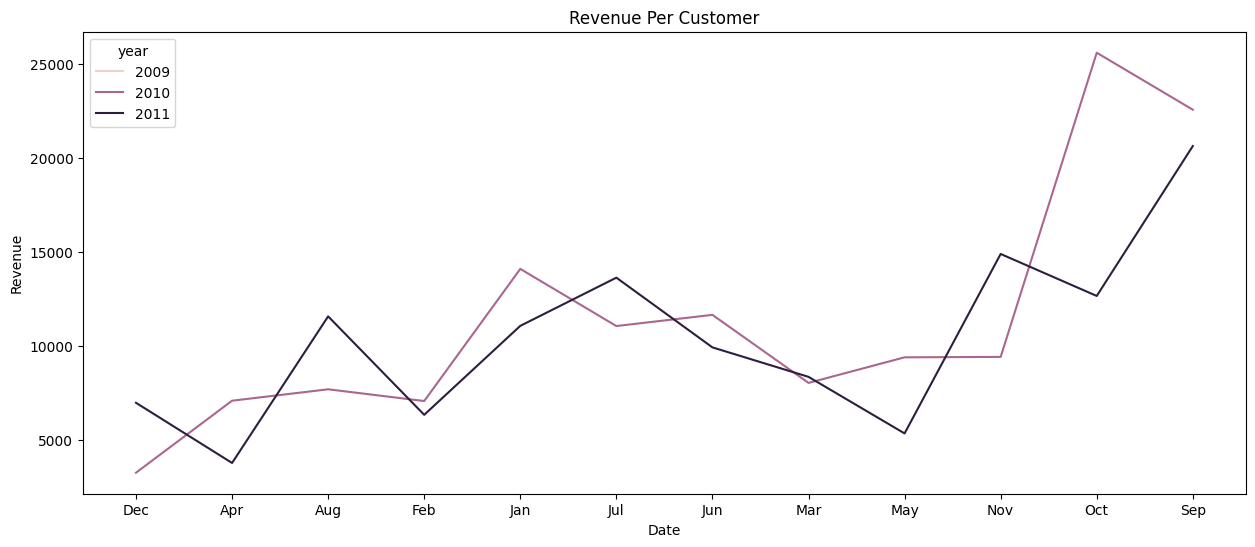

In [92]:

plt.figure(figsize=(15, 6))

sns.lineplot(x="month_name", y="sale_per_cstm", data=total_per_mon, hue="year")


plt.title("Revenue Per Customer")
plt.xlabel("Date")
plt.ylabel("Revenue")

plt.show()


## deal per customer

In [86]:
total_per_mon["deal_per_cstm"] = total_per_mon["number_of_deals"] / total_per_mon["number_of_customers"]
total_per_mon = total_per_mon.loc[total_per_mon["Country"] == "EIRE"]

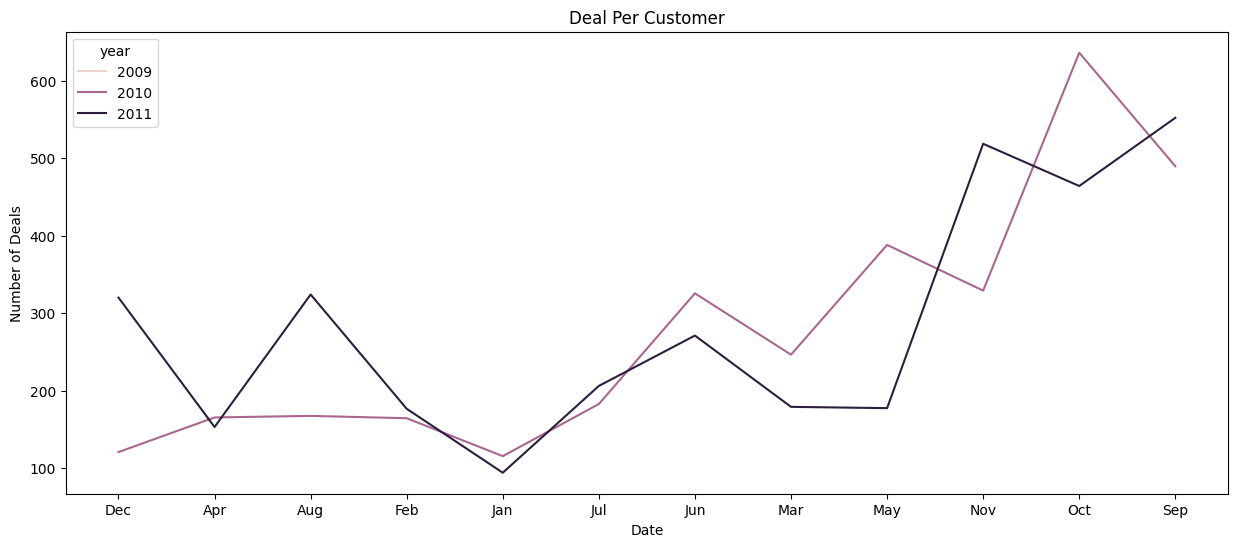

In [87]:

plt.figure(figsize=(15, 6))

sns.lineplot(x="month_name", y="deal_per_cstm", data=total_per_mon, hue="year")

plt.title("Deal Per Customer")
plt.xlabel("Date")
plt.ylabel("Number of Deals")

plt.show()


## Revenue per deal

In [89]:
total_per_mon["Revenue_per_deal"] = total_per_mon["deal_money"] / total_per_mon["number_of_deals"]
total_per_mon = total_per_mon.loc[total_per_mon["Country"] == "EIRE"]

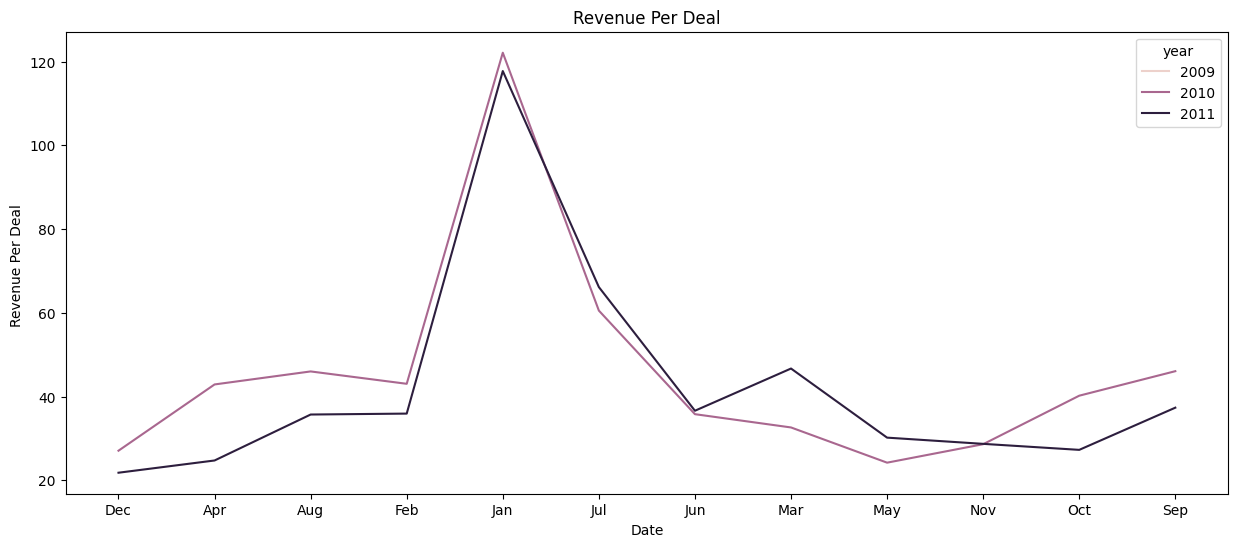

In [90]:

plt.figure(figsize=(15, 6))

sns.lineplot(x="month_name", y="Revenue_per_deal", data=total_per_mon, hue="year")

plt.title("Revenue Per Deal")
plt.xlabel("Date")
plt.ylabel("Revenue Per Deal ")

plt.show()


## churn rate

here i want to calculate churn rate of december of 2011 rather to october of 2011

In [43]:
df_oct = data[(data["InvoiceDate"].dt.month == 11) & (data["InvoiceDate"].dt.year == 2011)]
df_dec = data[(data["InvoiceDate"].dt.month == 12) & (data["InvoiceDate"].dt.year == 2011)]


churn_rate = (df_dec["CustomerID"].nunique() / df_oct["CustomerID"].nunique()) * 100
churn_rate

40.09351256575102

## Customer Lifetime Value (CLV)

for last month of 2011
i assume Gross margin of all produacts is 50% and churn rate is 40%

In [44]:
# average revenue per user for 
rev_per_usr_dec = total_per_mon[(total_per_mon["month_name"] == "Dec") & (total_per_mon["year"] == 2011)]
average_revenue = rev_per_usr_dec["sale_per_cstm"].mean()
average_revenue

1281.8487513157893

In [45]:
# Calculate CLV
GROSS_MARGIN = 0.5

CLV = (average_revenue * GROSS_MARGIN ) / churn_rate
CLV

15.985737707735536

# conclusion 
This dataset serves as an excellent resource for analyzing company performance. Its most significant limitation lies in the absence of profit margins for individual products. Additionally, it lacks data on churned customers, hindering the calculation of churn rate and related KPIs. This lack of data may stem from either not recording information or engaging with customers without a specific strategy. A beneficial approach for the company could involve offering partnerships and encouraging customers to create accounts.